<a href="https://colab.research.google.com/github/Viddesh1/TCS_Sem_3_IA1_IA2/blob/main/TCS_Sem-3/IA_3/IA_3_minimal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# In this exercise you will train a CNN on the FULL Cats-v-dogs dataset
# This will require you doing a lot of data preprocessing because
# the dataset isn't split into training and validation for you
# This code block has all the required inputs
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

In [2]:
# This code block downloads the full Cats-v-Dogs dataset and stores it as
# cats-and-dogs.zip. It then unzips it to /tmp
# which will create a tmp/PetImages directory containing subdirectories
# called 'Cat' and 'Dog' (that's how the original researchers structured it)
# If the URL doesn't work,
# .   visit https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765
# And right click on the 'Download Manually' link to get a new URL
# OR There is also one other way around if you don't want to upload downloaded data manually
# Go to the same link and open the data url in new window and copy and paste the url in wget

!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip" \
    -O "/tmp/cats-and-dogs.zip"

local_zip = '/tmp/cats-and-dogs.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

--2023-10-18 13:32:38--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.6.204.160, 2600:1407:d800:293::317f, 2600:1407:d800:2a4::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.6.204.160|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.67M   112MB/s    in 6.1s    

2023-10-18 13:32:44 (129 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824887076/824887076]



In [3]:
print(len(os.listdir('/tmp/PetImages/Cat/')))
print(len(os.listdir('/tmp/PetImages/Dog/')))


12501
12501


In [4]:
# Use os.mkdir to create your directories
# You will need a directory for cats-v-dogs, and subdirectories for training
# and testing. These in turn will need subdirectories for 'cats' and 'dogs'
to_create = [
    '/tmp/cats-v-dogs',
    '/tmp/cats-v-dogs/training',
    '/tmp/cats-v-dogs/testing',
    '/tmp/cats-v-dogs/training/cats',
    '/tmp/cats-v-dogs/training/dogs',
    '/tmp/cats-v-dogs/testing/cats',
    '/tmp/cats-v-dogs/testing/dogs'
]

for directory in to_create:
    try:
        os.mkdir(directory)
        print(directory, 'created')
    except:
        print(directory, 'failed')

/tmp/cats-v-dogs created
/tmp/cats-v-dogs/training created
/tmp/cats-v-dogs/testing created
/tmp/cats-v-dogs/training/cats created
/tmp/cats-v-dogs/training/dogs created
/tmp/cats-v-dogs/testing/cats created
/tmp/cats-v-dogs/testing/dogs created


In [5]:
# Write a python function called split_data which takes
# a SOURCE directory containing the files
# a TRAINING directory that a portion of the files will be copied to
# a TESTING directory that a portion of the files will be copied to
# a SPLIT SIZE to determine the portion
# The files should also be randomized, so that the training set is a random
# X% of the files, and the test set is the remaining files
# SO, for example, if SOURCE is PetImages/Cat, and SPLIT SIZE is .9
# Then 90% of the images in PetImages/Cat will be copied to the TRAINING dir
# and 10% of the images will be copied to the TESTING dir
# Also -- All images should be checked, and if they have a zero file length,
# they will not be copied over
#
# os.listdir(DIRECTORY) gives you a listing of the contents of that directory
# os.path.getsize(PATH) gives you the size of the file
# copyfile(source, destination) copies a file from source to destination
# random.sample(list, len(list)) shuffles a list
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[:testing_length]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)


CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
TRAINING_CATS_DIR = "/tmp/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "/tmp/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"
TRAINING_DOGS_DIR = "/tmp/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "/tmp/cats-v-dogs/testing/dogs/"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

# Expected output
# 666.jpg is zero length, so ignoring
# 11702.jpg is zero length, so ignoring

666.jpg is zero length, so ignoring.
11702.jpg is zero length, so ignoring.


In [6]:
print(len(os.listdir('/tmp/cats-v-dogs/training/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/training/dogs/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/dogs/')))

# Expected output:
# 11250
# 11250
# 1250
# 1250

11250
11250
1250
1250


In [7]:
# DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
# USE AT LEAST 3 CONVOLUTION LAYERS
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') # For Binary Classification task
])

model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


In [8]:
TRAINING_DIR = '/tmp/cats-v-dogs/training'
train_datagen = ImageDataGenerator(
    rescale=1 / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    batch_size=64,
    class_mode='binary',
    target_size=(150, 150)
)

VALIDATION_DIR = '/tmp/cats-v-dogs/testing'
validation_datagen = ImageDataGenerator(
    rescale=1 / 255,
    rotation_range= 40,
    width_shift_range= 0.2,
    height_shift_range= 0.2,
    shear_range= 0.2,
    zoom_range= 0.2,
    horizontal_flip=True,
    fill_mode='nearest'

)
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    batch_size=64,
    class_mode='binary',
    target_size=(150, 150)
)


# Expected Output:
# Found 22498 images belonging to 2 classes.
# Found 2500 images belonging to 2 classes.


Found 22498 images belonging to 2 classes.
Found 2499 images belonging to 2 classes.


In [9]:
# import warnings
# warnings.filterwarnings('ignore')
# print('warnings ignored')

# UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version.
# Please use `Model.fit`, which supports generators.

history = model.fit(train_generator, \
                              epochs=15,
                              verbose=1,
                              validation_data=validation_generator)

Epoch 1/15
121/352 [=========>....................] - ETA: 1:37 - loss: 0.7004 - accuracy: 0.5227

/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


352/352 [==============================] - 176s 468ms/step - loss: 0.6700 - accuracy: 0.5822 - val_loss: 0.6310 - val_accuracy: 0.6395
Epoch 2/15
352/352 [==============================] - 163s 463ms/step - loss: 0.6066 - accuracy: 0.6672 - val_loss: 0.5909 - val_accuracy: 0.6843
Epoch 3/15
352/352 [==============================] - 213s 606ms/step - loss: 0.5782 - accuracy: 0.6943 - val_loss: 0.5567 - val_accuracy: 0.7111
Epoch 4/15
352/352 [==============================] - 171s 487ms/step - loss: 0.5546 - accuracy: 0.7122 - val_loss: 0.5635 - val_accuracy: 0.6919
Epoch 5/15
352/352 [==============================] - 169s 480ms/step - loss: 0.5350 - accuracy: 0.7280 - val_loss: 0.5172 - val_accuracy: 0.7339
Epoch 6/15
352/352 [==============================] - 164s 466ms/step - loss: 0.5189 - accuracy: 0.7423 - val_loss: 0.4884 - val_accuracy: 0.7639
Epoch 7/15
352/352 [==============================] - 163s 463ms/step - loss: 0.5100 - accuracy: 0.7486 - val_loss: 0.4940 - val_accura

<Figure size 640x480 with 0 Axes>

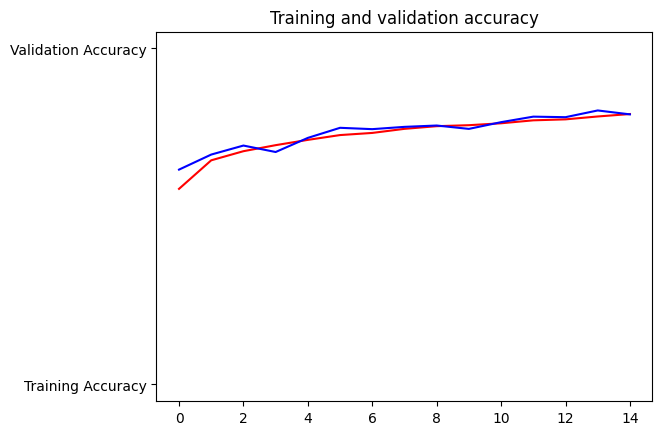

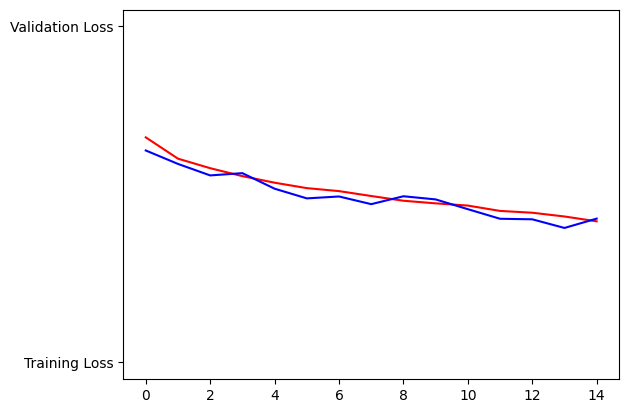

<Figure size 640x480 with 0 Axes>

In [10]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs


#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()


# Desired output. Charts with training and validation metrics. No crash :)


In [11]:
# Connecting to google drive
from google.colab import drive
drive.mount("/content/drive")

# Creating a folder in google drive to save all the necessary output.
!mkdir -p /content/drive/MyDrive/TCS_Sem3_IA3_output/

Mounted at /content/drive


In [12]:
# Saving the history object in excel file using pandas.
# pip install openpyxl
import pandas as pd

history_dict = {
    'epoch': list(range(1, len(history.history['loss']) + 1)),
    'loss': history.history['loss'],
    'accuracy': history.history['accuracy'],
    'val_loss': history.history['val_loss'],
    'val_accuracy': history.history['val_accuracy']
}
history_df = pd.DataFrame(history_dict)
excel_file_path = '/content/drive/MyDrive/TCS_Sem3_IA3_output/custom_history.xlsx'  # Replace with your desired file path
history_df.to_excel(excel_file_path, index=False)

In [13]:
# Save the model and load the model

model.save("/content/drive/MyDrive/TCS_Sem3_IA3_output/custom_model.keras")


# Loading the entire model (Architecture and weights) from current directory
from tensorflow.keras.models import load_model


model = load_model("/content/drive/MyDrive/TCS_Sem3_IA3_output/custom_model.keras")

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 64)        0

In [15]:
# Evaluate the model on the test data set

loss, accuracy = model.evaluate(validation_generator, verbose = 0)

# Evaluation result
print("Test loss: ", loss)
print("Test accuracy: ", accuracy)

Test loss:  0.42154595255851746
Test accuracy:  0.8103241324424744


In [16]:
# Making prediction of custom model
import numpy as np


predicted = model.predict(validation_generator)
final_predictions = np.argmax(predicted, axis = 1)
final_predictions

40/40 [==============================] - 18s 440ms/step


array([0, 0, 0, ..., 0, 0, 0])

2/2 [==============================] - 0s 7ms/step


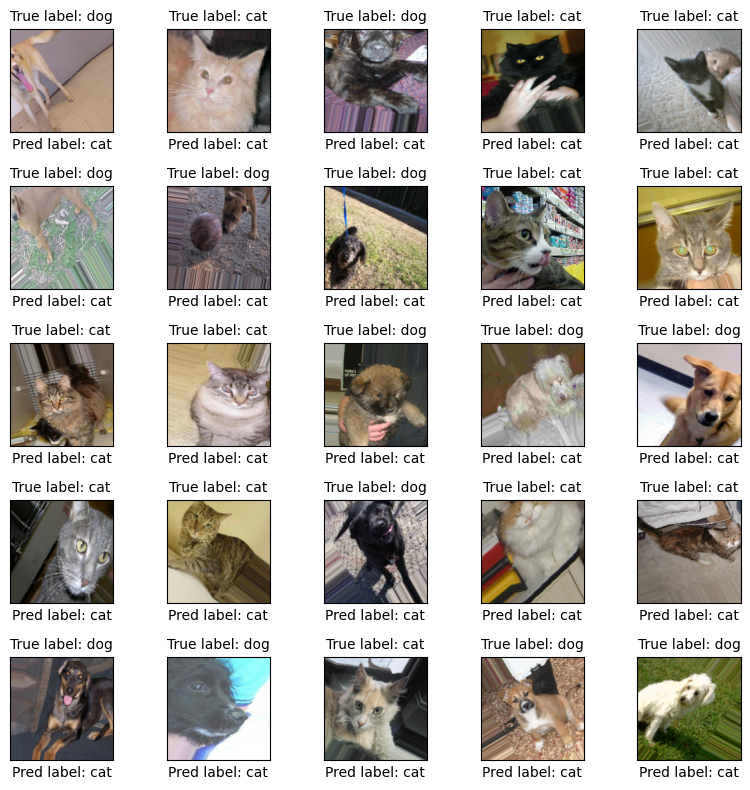

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Define a mapping dictionary for class labels
class_labels = {0: 'cat', 1: 'dog'}

# Assuming you have already defined your model and loaded the data generators as before

# Get a batch of images and true labels from the validation generator
batch_images, true_labels = next(validation_generator)

# Model prediction
predictions = model.predict(batch_images)
predicted_labels = np.argmax(predictions, axis=1)

# Display the images with true and predicted labels
plt.figure(figsize=(8, 8))
for i in range(25):  # Use 25 as the step in range to display 25 images
    plt.subplot(5, 5, i + 1)  # Subplot positions start at 1, not 0
    plt.xticks([])  # Hide x-axis ticks
    plt.yticks([])  # Hide y-axis ticks
    plt.imshow(batch_images[i])
    true_label = class_labels[true_labels[i]]
    predicted_label = class_labels[predicted_labels[i]]
    plt.title(f"True label: {true_label}", fontsize=10)
    plt.xlabel(f"Pred label: {predicted_label}", fontsize=10)


# Save the plot before displaying it
plot_filename = '/content/drive/MyDrive/TCS_Sem3_IA3_output/Custom_prediction.png'  # Specify the desired file name and extension
plt.savefig(plot_filename)

plt.tight_layout()
plt.show()


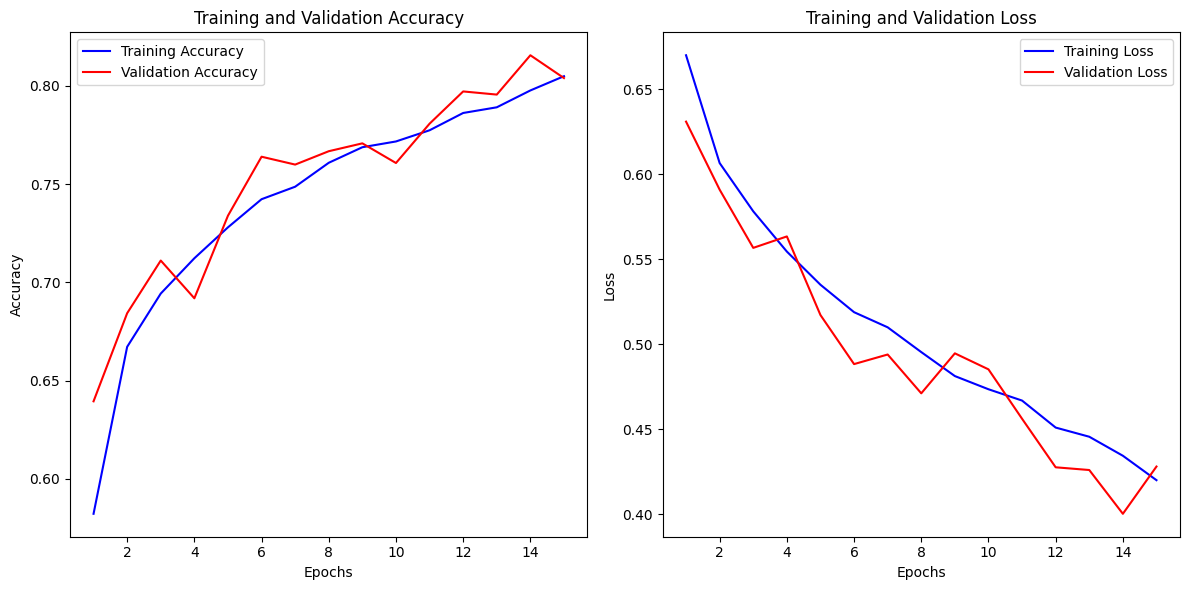

In [25]:
# Extract data from the history object
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, "b", label="Training Accuracy")
plt.plot(epochs, val_acc, "r", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, "b", label="Training Loss")
plt.plot(epochs, val_loss, "r", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Saving the plot
plot_filename = '/content/drive/MyDrive/TCS_Sem3_IA3_output/Custom_Accuracy_Loss_Plot.png'  # Specify the desired file name and extension
plt.savefig(plot_filename)

plt.tight_layout()
plt.show()

## Transer Learning

In [26]:
# Transer Learning


import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras import layers, Sequential

# # Define your data generators
# TRAINING_DIR = '/tmp/cats-v-dogs/training'
# train_datagen = ImageDataGenerator(
#     rescale=1.0 / 255,
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )
# train_generator = train_datagen.flow_from_directory(
#     TRAINING_DIR,
#     batch_size=64,
#     class_mode='binary',
#     target_size=(150, 150)
# )

# VALIDATION_DIR = '/tmp/cats-v-dogs/testing'
# validation_datagen = ImageDataGenerator(
#     rescale=1.0 / 255,
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )
# validation_generator = validation_datagen.flow_from_directory(
#     VALIDATION_DIR,
#     batch_size=64,
#     class_mode='binary',
#     target_size=(150, 150)
# )

# Create the EfficientNetB7 model with transfer learning
base_model = EfficientNetB7(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    layers.RandomFlip(mode="horizontal"),
    layers.RandomRotation(factor=0.2),
    base_model,
    layers.Flatten(),
    layers.Dense(units=512, activation="relu"),
    layers.Dense(units=100, activation="relu"),
    layers.Dense(units=1, activation="sigmoid")  # For binary classification, use "sigmoid"
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
efficientNetB7_training = model.fit(train_generator, epochs=15, verbose=1, validation_data=validation_generator)


258076736/258076736 [==============================] - 1s 0us/step
Epoch 1/15
 90/352 [======>.......................] - ETA: 2:26 - loss: 5.2214 - accuracy: 0.5000

/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


352/352 [==============================] - 260s 658ms/step - loss: 2.3064 - accuracy: 0.5000 - val_loss: 0.7722 - val_accuracy: 0.5002
Epoch 2/15
352/352 [==============================] - 224s 636ms/step - loss: 0.8090 - accuracy: 0.4995 - val_loss: 0.6900 - val_accuracy: 0.5906
Epoch 3/15
352/352 [==============================] - 222s 630ms/step - loss: 0.7211 - accuracy: 0.5072 - val_loss: 0.6961 - val_accuracy: 0.4998
Epoch 4/15
352/352 [==============================] - 241s 686ms/step - loss: 0.7047 - accuracy: 0.5030 - val_loss: 0.7040 - val_accuracy: 0.4998
Epoch 5/15
352/352 [==============================] - 224s 637ms/step - loss: 0.7230 - accuracy: 0.5010 - val_loss: 0.6933 - val_accuracy: 0.5002
Epoch 6/15
352/352 [==============================] - 225s 638ms/step - loss: 0.6937 - accuracy: 0.5017 - val_loss: 0.6932 - val_accuracy: 0.4998
Epoch 7/15
352/352 [==============================] - 224s 635ms/step - loss: 0.7115 - accuracy: 0.4973 - val_loss: 0.6932 - val_accura

In [27]:
# Saving the history object in excel file using pandas.
# pip install openpyxl
import pandas as pd

history_dict = {
    'epoch': list(range(1, len(efficientNetB7_training.history['loss']) + 1)),
    'loss': efficientNetB7_training.history['loss'],
    'accuracy': efficientNetB7_training.history['accuracy'],
    'val_loss': efficientNetB7_training.history['val_loss'],
    'val_accuracy': efficientNetB7_training.history['val_accuracy']
}
history_df = pd.DataFrame(history_dict)
excel_file_path = '/content/drive/MyDrive/TCS_Sem3_IA3_output/Pre_train_history.xlsx'  # Replace with your desired file path
history_df.to_excel(excel_file_path, index=False)

In [41]:
# Save the model and load the model

model.save("/content/drive/MyDrive/TCS_Sem3_IA3_output/Pre_train_model.keras")


# Loading the entire model (Architecture and weights) from current directory
# from tensorflow.keras.models import load_model


# model = load_model("/content/drive/MyDrive/TCS_Sem3_IA3_output/Pre_train_model.keras")

ValueError: ignored

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, None, None, None   0         
                             )                                   
                                                                 
 random_rotation (RandomRot  (None, None, None, None   0         
 ation)                      )                                   
                                                                 
 efficientnetb7 (Functional  (None, 5, 5, 2560)        64097687  
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, None)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               32768512  
                                                      

In [34]:
# Evaluate the model on the test data set

loss, accuracy = model.evaluate(validation_generator, verbose = 0)

# Evaluation result
print("Test loss: ", loss)
print("Test accuracy: ", accuracy)

Test loss:  0.693148136138916
Test accuracy:  0.500200092792511


In [35]:
# Making prediction of custom model
import numpy as np


predicted = model.predict(validation_generator)
final_predictions = np.argmax(predicted, axis = 1)
final_predictions

40/40 [==============================] - 28s 574ms/step


array([0, 0, 0, ..., 0, 0, 0])

2/2 [==============================] - 7s 102ms/step


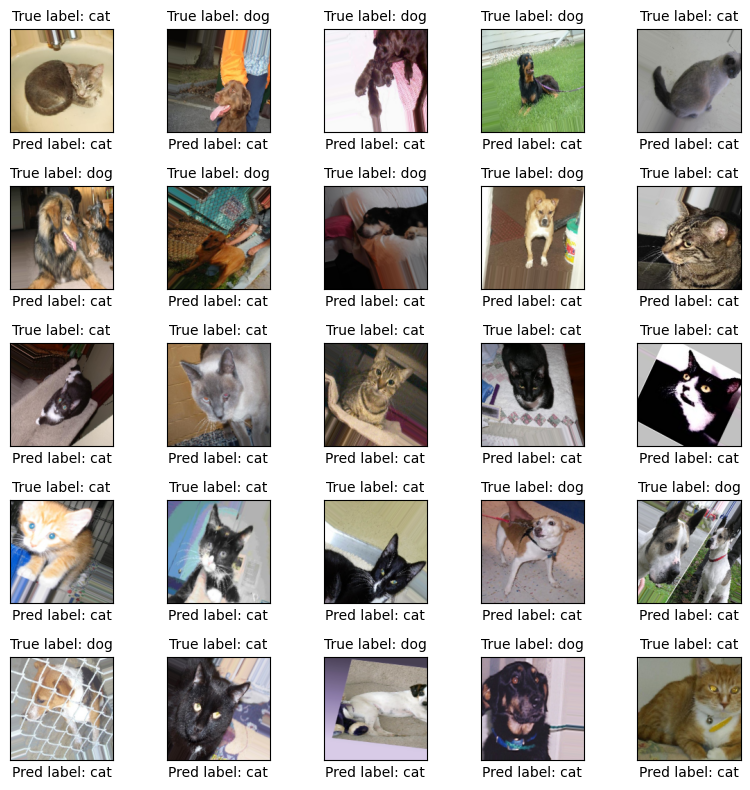

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Define a mapping dictionary for class labels
class_labels = {0: 'cat', 1: 'dog'}

# Assuming you have already defined your model and loaded the data generators as before

# Get a batch of images and true labels from the validation generator
batch_images, true_labels = next(validation_generator)

# Model prediction
predictions = model.predict(batch_images)
predicted_labels = np.argmax(predictions, axis=1)

# Display the images with true and predicted labels
plt.figure(figsize=(8, 8))
for i in range(25):  # Use 25 as the step in range to display 25 images
    plt.subplot(5, 5, i + 1)  # Subplot positions start at 1, not 0
    plt.xticks([])  # Hide x-axis ticks
    plt.yticks([])  # Hide y-axis ticks
    plt.imshow(batch_images[i])
    true_label = class_labels[true_labels[i]]
    predicted_label = class_labels[predicted_labels[i]]
    plt.title(f"True label: {true_label}", fontsize=10)
    plt.xlabel(f"Pred label: {predicted_label}", fontsize=10)


# Save the plot before displaying it
plot_filename = '/content/drive/MyDrive/TCS_Sem3_IA3_output/Pre_train_prediction.png'  # Specify the desired file name and extension
plt.savefig(plot_filename)

plt.tight_layout()
plt.show()


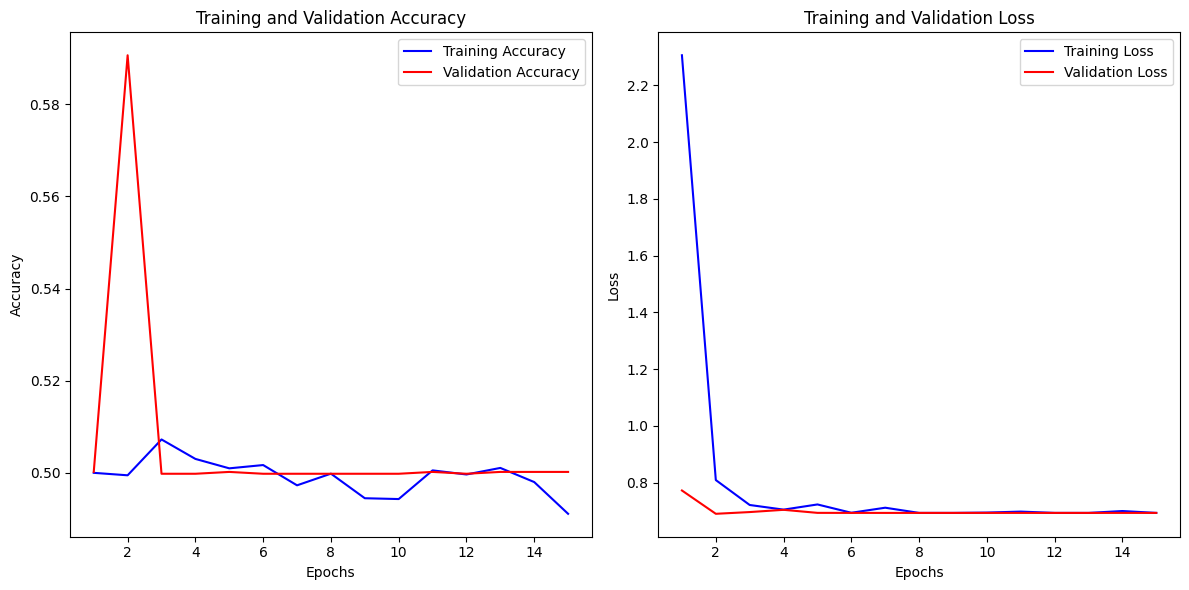

In [40]:
# Extract data from the history object
acc = efficientNetB7_training.history["accuracy"]
val_acc = efficientNetB7_training.history["val_accuracy"]
loss = efficientNetB7_training.history["loss"]
val_loss = efficientNetB7_training.history["val_loss"]
epochs = range(1, len(loss) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, "b", label="Training Accuracy")
plt.plot(epochs, val_acc, "r", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, "b", label="Training Loss")
plt.plot(epochs, val_loss, "r", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Saving the plot
plot_filename = '/content/drive/MyDrive/TCS_Sem3_IA3_output/Pre_train_Accuracy_Loss_Plot.png'  # Specify the desired file name and extension
plt.savefig(plot_filename)

plt.tight_layout()
plt.show()